<a href="https://colab.research.google.com/github/kavir93/Financial-Analysis-and-Data-representation/blob/main/TSLABTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from copy import copy

In [88]:
bitcoin_data1 = pd.read_csv('/content/drive/MyDrive/BTC-USD (1).csv')

bitcoin_data1



,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8.036550e+06
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7.860650e+06
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,3.305440e+07
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,5.562910e+07
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,4.396280e+07
...,...,...,...,...,...,...,...
2227,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,5.859807e+10
2228,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,7.132603e+10
2229,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,6.550064e+10
2230,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,1.014672e+11


In [89]:
tesla_data1 = pd.read_csv('/content/drive/MyDrive/TSLA (1).csv')
tesla_data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788000,5.900000,5.530000,5.616000,5.616000,4640500
1,2012-01-04,5.642000,5.734000,5.500000,5.542000,5.542000,3150500
2,2012-01-05,5.552000,5.586000,5.370000,5.424000,5.424000,5027500
3,2012-01-06,5.440000,5.558000,5.282000,5.382000,5.382000,4931500
4,2012-01-09,5.400000,5.498000,5.224000,5.450000,5.450000,4485000
...,...,...,...,...,...,...,...
2285,2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200
2286,2021-02-03,877.020020,878.080017,853.059998,854.690002,854.690002,18343500
2287,2021-02-04,855.000000,856.500000,833.419983,849.989990,849.989990,15812700
2288,2021-02-05,845.000000,864.770020,838.969971,852.229980,852.229980,18524800


In [90]:
final = pd.merge(tesla_data1,bitcoin_data1,on='Date')
final

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000,314.079010,315.838989,313.565002,315.032013,315.032013,7.860650e+06
1,2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500,265.084015,278.341003,265.084015,274.473999,274.473999,4.396280e+07
2,2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500,274.610992,287.553009,272.696014,286.188995,286.188995,2.324570e+07
3,2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000,286.076996,298.753998,283.079010,294.337006,294.337006,2.486680e+07
4,2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500,294.135010,294.135010,282.174988,283.348999,283.348999,1.998250e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200,33533.199219,35896.882813,33489.218750,35510.289063,35510.289063,6.308859e+10
1532,2021-02-03,877.020020,878.080017,853.059998,854.690002,854.690002,18343500,35510.820313,37480.187500,35443.984375,37472.089844,37472.089844,6.116682e+10
1533,2021-02-04,855.000000,856.500000,833.419983,849.989990,849.989990,15812700,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,6.883807e+10
1534,2021-02-05,845.000000,864.770020,838.969971,852.229980,852.229980,18524800,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,5.859807e+10


In [58]:
df1 = pd.DataFrame({'item1':[1,2,3,4,5],'item2':['a1','b1','c1','d1','e1']})
df1

,item1,item2
0,1,a1
1,2,b1
2,3,c1
3,4,d1
4,5,e1


In [57]:
df2 = pd.DataFrame({'item1':[3,4,5],'item3':['c2','d2','e2']})
df2

,item1,item3
0,3,c2
1,4,d2
2,5,e2


In [59]:
df3 = pd.merge(df1,df2,on='item1')
df3


,item1,item2,item3
0,3,c1,c2
1,4,d1,d2
2,5,e1,e2


In [61]:
del df3['item3']

In [62]:
df3

,item1,item2
0,3,c1
1,4,d1
2,5,e1


In [91]:
final_df = final.drop(['Open_x','Open_y','High_x','High_y','Low_x','Low_y','Adj Close_x','Adj Close_y','Volume_x','Volume_y'],axis=1)

In [92]:
final_df.rename(columns = {'Close_x':'Tesla','Close_y':'BTCUSD'},inplace=True)

In [93]:
final_df

,Date,Tesla,BTCUSD
0,2015-01-02,43.862000,315.032013
1,2015-01-05,42.018002,274.473999
2,2015-01-06,42.256001,286.188995
3,2015-01-07,42.189999,294.337006
4,2015-01-08,42.124001,283.348999
...,...,...,...
1531,2021-02-02,872.789978,35510.289063
1532,2021-02-03,854.690002,37472.089844
1533,2021-02-04,849.989990,36926.066406
1534,2021-02-05,852.229980,38144.308594


In [71]:
def normalized(df):
  x = df.copy()

  for i in x.columns[1:]:
    x[i]=x[i]/x[i][0]
  return x

In [72]:
def interactiveplot(df,title):
  fig = px.line(title=title)
  for j in df.columns[1:]:
    fig.add_scatter(x=df['Date'],y=df[j],name=j)
  fig.show()

In [94]:
interactiveplot(normalized(final_df),'Normalized Returns for Tesla and Bitcoin (USD)')

In [75]:
def daily_return(df):
  daily_return = df.copy()

  for i in df.columns[1:]:
    for j in range(1,len(df)):
      daily_return[i][j] = ( (df[i][j]-df[i][j-1])/df[i][j-1])*100
    daily_return[i][0] = 0
  return daily_return


In [95]:
final_df2 = daily_return(final_df)
final_df2

,Date,Tesla,BTCUSD
0,2015-01-02,0.000000,0.000000
1,2015-01-05,-4.204090,-12.874252
2,2015-01-06,0.566422,4.268162
3,2015-01-07,-0.156196,2.847073
4,2015-01-08,-0.156430,-3.733138
...,...,...,...
1531,2021-02-02,3.927076,5.883361
1532,2021-02-03,-2.073807,5.524598
1533,2021-02-04,-0.549908,-1.457147
1534,2021-02-05,0.263531,3.299139


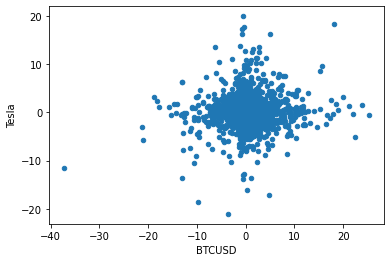

In [96]:
final_df2.plot(kind='scatter',x='BTCUSD',y='Tesla');

In [102]:
beta1, alpha1 = np.polyfit(final_df2['BTCUSD'],final_df2['Tesla'],1)

ValueError: ignored

NameError: ignored

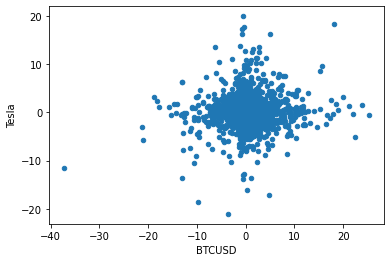

In [100]:
final_df2.plot(kind='scatter',x='BTCUSD',y='Tesla')
plt.plot(final_df2['BTCUSD'],beta1*final_df2['BTCUSD']+alpha1,'-',color='r');
